In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!kaggle datasets download -d ashkhagan/figshare-brain-tumor-dataset

100% 836M/839M [00:29<00:00, 23.2MB/s]
100% 839M/839M [00:29<00:00, 29.6MB/s]


In [3]:
! unzip figshare-brain-tumor-dataset.zip

Archive:  figshare-brain-tumor-dataset.zip
  inflating: dataset/README.txt      
  inflating: dataset/cvind.mat       
  inflating: dataset/data/1.mat      
  inflating: dataset/data/10.mat     
  inflating: dataset/data/100.mat    
  inflating: dataset/data/1000.mat   
  inflating: dataset/data/1001.mat   
  inflating: dataset/data/1002.mat   
  inflating: dataset/data/1003.mat   
  inflating: dataset/data/1004.mat   
  inflating: dataset/data/1005.mat   
  inflating: dataset/data/1006.mat   
  inflating: dataset/data/1007.mat   
  inflating: dataset/data/1008.mat   
  inflating: dataset/data/1009.mat   
  inflating: dataset/data/101.mat    
  inflating: dataset/data/1010.mat   
  inflating: dataset/data/1011.mat   
  inflating: dataset/data/1012.mat   
  inflating: dataset/data/1013.mat   
  inflating: dataset/data/1014.mat   
  inflating: dataset/data/1015.mat   
  inflating: dataset/data/1016.mat   
  inflating: dataset/data/1017.mat   
  inflating: dataset/data/1018.mat   
  infla

In [19]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Input,Concatenate
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import cv2
from tensorflow import keras

In [5]:
datadir="/content/dataset/data"
N=3064
traindata=[]

for i in range(1,N+1):
    filename=str(i)+".mat"
    data=h5py.File(os.path.join(datadir,filename),"r")
    traindata.append(data)

    if i%100==0:
      print(filename)

100.mat
200.mat
300.mat
400.mat
500.mat
600.mat
700.mat
800.mat
900.mat
1000.mat
1100.mat
1200.mat
1300.mat
1400.mat
1500.mat
1600.mat
1700.mat
1800.mat
1900.mat
2000.mat
2100.mat
2200.mat
2300.mat
2400.mat
2500.mat
2600.mat
2700.mat
2800.mat
2900.mat
3000.mat


In [6]:
import random

random.shuffle(traindata)

In [7]:
train_images = []
train_labels = []
test_images = []
test_labels = []
temp=round(4*3064/5)

for i in range(temp):
  img = traindata[i]["cjdata"]["image"]
  if img.shape==(512,512):
    img=np.expand_dims(img,axis=2)
    train_images.append(img)
    lbl = traindata[i]["cjdata"]["label"]
    label=int(lbl[0])-1
    train_labels.append(label)

for i in range(temp,3064):
  img = traindata[i]["cjdata"]["image"]
  if img.shape==(512,512):
    img=np.expand_dims(img,axis=2)
    test_images.append(img)
    lbl = traindata[i]["cjdata"]["label"]
    label=int(lbl[0])-1
    test_labels.append(label) 

In [8]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [34]:
image_size = [512,512]

In [35]:
img_input = Input(shape=(512,512,1))
img_conc = Concatenate()([img_input, img_input, img_input])  

In [36]:
vgg = VGG16(input_tensor = img_conc,weights='imagenet',include_top=False)

In [37]:
vgg.output

<KerasTensor: shape=(None, 16, 16, 512) dtype=float32 (created by layer 'block5_pool')>

In [38]:
x = vgg.output
x = GlobalAveragePooling2D()(x)

In [39]:
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512, activation='relu')(x)

In [40]:
preds = Dense(3,activation='softmax')(x)

In [41]:
model = Model(inputs = vgg.input,outputs=preds)

In [42]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 512, 512, 3)  0           ['input_4[0][0]',                
                                                                  'input_4[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 512, 512, 64  1792        ['concatenate_1[0][0]']    

In [43]:
for layer in vgg.layers:
    layer.trainable = False

In [44]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [57]:
r = model.fit(train_images,train_labels,epochs=10,batch_size=32,shuffle = False)

Epoch 1/10
77/77 [==============================] - 64s 832ms/step - loss: 0.1403 - accuracy: 0.9491
Epoch 2/10
77/77 [==============================] - 63s 817ms/step - loss: 0.1400 - accuracy: 0.9471
Epoch 3/10
77/77 [==============================] - 63s 813ms/step - loss: 0.1631 - accuracy: 0.9372
Epoch 4/10
77/77 [==============================] - 63s 816ms/step - loss: 0.1608 - accuracy: 0.9356
Epoch 5/10
77/77 [==============================] - 63s 814ms/step - loss: 0.1289 - accuracy: 0.9401
Epoch 6/10
77/77 [==============================] - 63s 816ms/step - loss: 0.1132 - accuracy: 0.9504
Epoch 7/10
77/77 [==============================] - 63s 816ms/step - loss: 0.0967 - accuracy: 0.9643
Epoch 8/10
77/77 [==============================] - 63s 815ms/step - loss: 0.0894 - accuracy: 0.9635
Epoch 9/10
77/77 [==============================] - 63s 815ms/step - loss: 0.1063 - accuracy: 0.9569
Epoch 10/10
77/77 [==============================] - 63s 815ms/step - loss: 0.1400 - accura

In [49]:
result=model.evaluate(test_images,test_labels)
print(result)

20/20 [==============================] - 16s 777ms/step - loss: 0.2858 - accuracy: 0.8773
[0.2858101725578308, 0.8772504329681396]


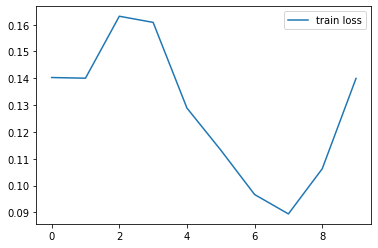

<Figure size 432x288 with 0 Axes>

In [58]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_VGGnet')

In [59]:
label_pred_keras = model.predict(test_images)
print(label_pred_keras)

10/20 [==============>...............] - ETA: 8s

KeyboardInterrupt: ignored

In [64]:
label_pred_keras = model.predict(test_images[81][None,...])
print(label_pred_keras)

1/1 [==============================] - 0s 42ms/step
[[7.1136041e-05 8.1474267e-02 9.1845465e-01]]


In [65]:
final_class = np.unravel_index(label_pred_keras.argmax(),label_pred_keras.shape)
if final_class[1] == 0:
  print("meningioma")
elif final_class[1] == 1:
  print("glioma")
else:
  print("pituitary")

pituitary


In [66]:
model.save('VGG_transfer.h5')

In [67]:
!cp "/content/VGG_transfer.h5" "/content/drive/MyDrive/Final_year_project/"